## Imagen a texto
Generar texo a partir de una imagen otra de las tareas de visión por computador, puede suponer el detectar el texto dentro de una imagen (OCR de Optical Character Recognitio), con el modelo microsoft/trocr-base-handwritten probamos a reconocer texto escrito a mano.

In [1]:
from transformers import pipeline
import requests
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Avoid some warning
%env TOKENIZERS_PARALLELISM=false

2025-01-09 09:17:10.793119: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-09 09:17:10.793159: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-09 09:17:10.794127: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-09 09:17:10.798979: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-09 09:17:11.345017: W tensorflow/compiler/tf2

env: TOKENIZERS_PARALLELISM=false


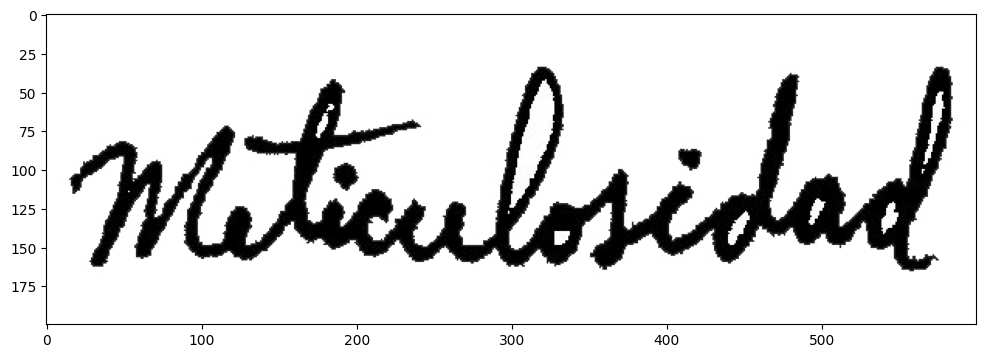

In [2]:
# Download an image
#url = "https://fki.tic.heia-fr.ch/static/img/a01-122-02-00.jpg"
url = "https://bass-tian.com/es/img/Meticulosidad.jpg"
image_data = requests.get(url, stream=True).raw
image = Image.open(image_data)

#Convert PIL Image, convert it to a format suitable for matplotlib
image_np = np.array(image)

#Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(12, 9))  # Width, height in inches
ax.imshow(image_np)

plt.show()

In [3]:
# Allocate and execute a pipeline for ocr
ocr = pipeline(model='microsoft/trocr-base-handwritten')
ocr(image)

config.json:   0%|          | 0.00/4.17k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": false,
  "transformers_version": "4.47.0"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 4096,
  "decoder

generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

Device set to use cuda:0


[{'generated_text': 'meticulousidad'}]

También se puede generar una leyenda que describa a una imagen, con el modelo nlpconnect/vit-gpt2-image-captioning probamos a reconocer el bodegón anterior.

config.json:   0%|          | 0.00/4.61k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.47.0"
}

Config of the decoder: <class 'transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel'> is overwritten by shared decoder config: GPT2Config {
  "activation_function": "gelu_new",
  "add_cross_attention": true,
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_rang

tokenizer_config.json:   0%|          | 0.00/241 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

Device set to use cuda:0


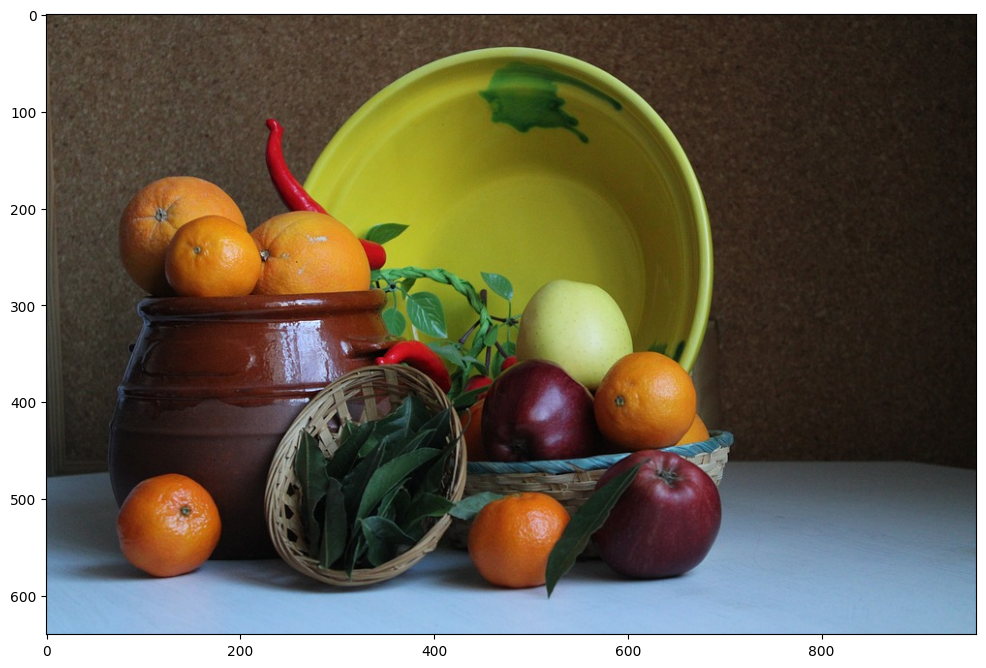

In [4]:
# Allocate and execute a pipeline for image caption
captioner = pipeline(model='nlpconnect/vit-gpt2-image-captioning')

# Download an image
url = "https://cdn.pixabay.com/photo/2021/12/23/05/27/still-life-6888656_960_720.jpg"
image_data = requests.get(url, stream=True).raw
image_sl = Image.open(image_data)

# Convert PIL Image, convert it to a format suitable for matplotlib
image_np = np.array(image_sl)

# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(12, 9))  # Width, height in inches
ax.imshow(image_np)

plt.show()

In [5]:
captioner(image_sl)

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


[{'generated_text': 'a bowl of fruit with oranges and a bowl of apples '}]

In [ ]:
# !nvidia-smi

# Reiniciando kernel para limpiar la memoria de la GPU
!pkill -9 -f ipykernel_launcher